# Modelando Regresion lineal

La regresion lineal es una tecnica estadistica aprendizaje de datos buscando correlacionar una variable a otra de forma directa.
Es la base de modelos mas avanzados como multilineales, polinomicos y otras técnicas de aprendizaje de máquina mas avanzadas.

In [3]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np

In [4]:
# comzar a cargar los datos

housing_price_index = pd.read_csv('monthly-hpi.csv')
unemployment = pd.read_csv('unemployment-macro.csv')
federal_funds_rate = pd.read_csv('fed_funds.csv')
shiller = pd.read_csv('shiller.csv')
gross_domestic_product = pd.read_csv('gdp.csv')

In [6]:
housing_price_index.head()

,date,housing_price_index
0,2010-11-01,186.07
1,2010-12-01,183.27
2,2011-01-01,181.35
3,2011-02-01,179.66
4,2011-03-01,178.84


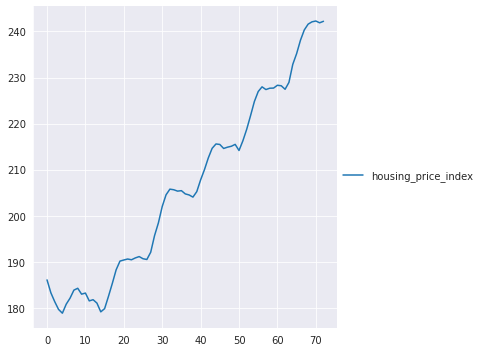

In [7]:
housing_price_index.describe()
sns.relplot(data=housing_price_index, kind="line")

In [8]:
tabla_df = (shiller.merge(housing_price_index, on='date')
                   .merge(unemployment, on='date')
                   .merge(federal_funds_rate, on='date')
                   .merge(gross_domestic_product, on='date'))

In [9]:
tabla_df.head()


,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


$ y_i = \alpha + \beta x_i + \epsilon_i$

* y: variable dependiente
* b: coeficiente de regresion
* a: interseccion con el plano
* x: variable predictora
* e: error

In [2]:
sns.relplot(data='tabla_df', y='housing_price_index',x='total_unemployed')

In [15]:
housing_model = ols("housing_price_index ~ total_unemployed", data=tabla_df).fit()

In [16]:
housing_model_summary = housing_model.summary()


In [18]:
housing_model_summary
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

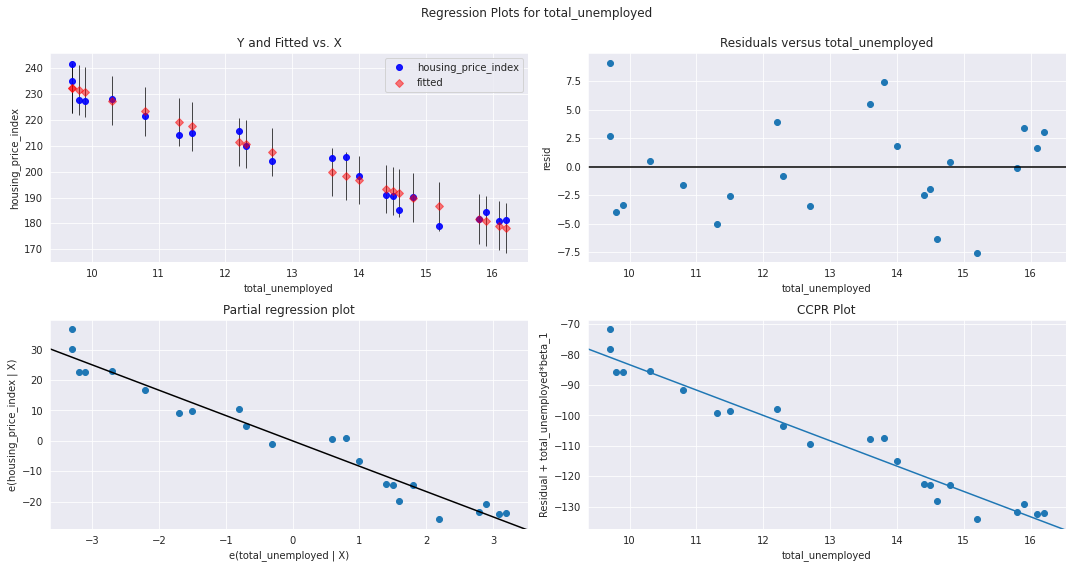

In [20]:
fig = plt.figure(figsize=(15,8))
# usamos el plot de regresion ya existente en la libreria
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)


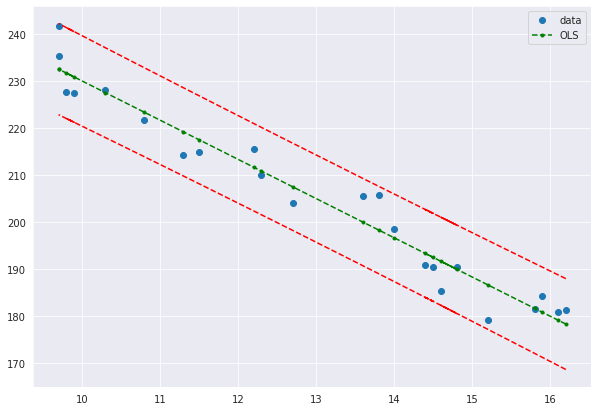

In [22]:
val_x = tabla_df[['total_unemployed']]
val_y = tabla_df[['housing_price_index']]

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(val_x, val_y, 'o', label="data")

ax.plot(val_x, housing_model.fittedvalues, 'g--.', label="OLS")
# plot upper and lower ci values
ax.plot(val_x, confidence_interval_upper, 'r--')
ax.plot(val_x, confidence_interval_lower, 'r--')
ax.legend(loc='best')

Credito:
basado en https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

